# Population
## Purpose
Takes in the .csv file created in the popualtion analysis notebook and examines the realtionship between poplation and medals won

## Datasets


Import Necessary Libraries

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
import os.path
from sklearn.linear_model import LinearRegression 
from glob import glob

## Loading in Dataset

In [412]:
filepath = '../../data/final/population.csv'

Reads the .csv file into a dataframe

In [413]:
if not os.path.exists( filepath ):
    print("Missing dataset file")
else:
    df = pd.read_csv(filepath , encoding = "ISO-8859-1")
    print("File Read")

File Read


Print the first five liens of the dataframe

In [414]:
df.head()

,Country,Host_City,Year,Gender,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,norm_Population,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females
0,Afghanistan,Beijing,2008,Men,0,0,1,1,1,0.000000,...,0.000000,0.000000,0.000000,0.019780,0.005080,0.000246,0.000315,0.000273,0.019769,0.019792
1,Afghanistan,London,2012,Men,0,0,1,1,1,0.000000,...,0.000000,0.000101,0.000048,0.022249,0.005726,0.000372,0.000280,0.000379,0.022204,0.022296
2,Algeria,Atlanta,1996,Men,2,0,1,3,7,0.003252,...,0.007588,0.004735,0.006418,0.021316,0.001466,0.003090,0.001726,0.003190,0.020957,0.021698
3,Algeria,Barcelone,1992,Men,0,0,1,1,1,0.000000,...,0.000000,0.000394,0.000184,0.019699,0.001347,0.002904,0.000622,0.002739,0.019361,0.020057
4,Algeria,Barcelone,1992,Women,1,0,0,1,3,0.001779,...,0.004152,0.000394,0.002484,0.019699,0.001347,0.002904,0.000622,0.002739,0.019361,0.020057


# Sets Figure settings

In [415]:
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)    # fontsize of the tick labels
plt.rc('legend', fontsize=15)    # legend fontsize
plt.rc('figure', titlesize=20, figsize=(15, 7.5))

# Basic Analysis

In [416]:
df.columns

Index(['Country', 'Host_City', 'Year', 'Gender', 'Gold', 'Silver', 'Bronze',
       'Total_Medals', 'Ath_Rating', 'Gold_Share', 'Medal_Share',
       'Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation', 'norm_Gold_Share',
       'norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females'],
      dtype='object')

In [417]:
df[['Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation']].describe()

,Rating_Share,Males,Females,Population_Density,Population,NOC_Males_Sent,NOC_Females_Sent,NOC_Total_Sent,Female_Representation,Male_Representation,Population_Representation
count,1898.000000,1.898000e+03,1.898000e+03,1898.000000,1.898000e+03,1898.000000,1898.000000,1898.000000,1.898000e+03,1.898000e+03,1.898000e+03
mean,0.016728,3.415993e+07,3.439341e+07,147.421087,6.855334e+07,80.846154,41.342993,122.189146,5.604750e-06,1.372722e-05,9.579786e-06
std,0.029546,9.153397e+07,8.712660e+07,414.760823,1.786134e+08,70.471591,49.824932,113.531951,1.457438e-05,3.780611e-05,2.488503e-05
min,0.000248,1.140400e+04,1.252200e+04,0.774571,2.392600e+04,1.000000,0.000000,1.000000,0.000000e+00,1.144086e-08,2.013702e-08
25%,0.001280,3.733198e+06,3.961458e+06,23.193431,7.570473e+06,31.000000,10.000000,45.000000,7.213287e-07,2.025303e-06,1.509191e-06
50%,0.005008,9.725721e+06,9.934960e+06,91.584983,1.967835e+07,58.000000,23.000000,82.000000,2.443268e-06,6.749397e-06,4.948979e-06
75%,0.018603,2.803873e+07,2.931480e+07,169.520618,5.758040e+07,107.000000,51.750000,158.750000,6.005773e-06,1.683685e-05,1.160402e-05
max,0.256757,7.103734e+08,6.682916e+08,8161.983988,1.378665e+09,379.000000,292.000000,649.000000,2.395783e-04,8.216313e-04,4.627158e-04


In [418]:
df.sample(5)

,Country,Host_City,Year,Gender,Gold,Silver,Bronze,Total_Medals,Ath_Rating,Gold_Share,...,norm_Gold_Share,norm_Medal_Share,norm_Rating_Share,norm_Population,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females
377,Cuba,Barcelone,1992,Women,14,1,4,19,48,0.024911,...,0.058126,0.044644,0.054234,0.007768,0.013001,0.028122,0.039185,0.035194,0.007596,0.007951
848,Italy,Montréal,1976,Men,2,23,4,29,56,0.004662,...,0.010878,0.091534,0.083293,0.040398,0.022960,0.008238,0.003943,0.008141,0.038189,0.042747
615,France,Turin,2006,F,1,0,5,6,8,0.005682,...,0.013258,0.045491,0.028429,0.046131,0.014059,0.001936,0.004122,0.002742,0.043925,0.048475
1336,Poland,Turin,2006,M,0,1,0,1,2,0.000000,...,0.000000,0.005862,0.006383,0.027648,0.015194,0.001898,0.003393,0.002506,0.025970,0.029432
498,Ethiopia,Atlanta,1996,Men,1,0,0,1,3,0.001626,...,0.003794,0.000202,0.002198,0.042891,0.006287,0.000399,0.001126,0.000614,0.041501,0.044369


In [419]:
temp = df.groupby(['Country','Host_City','Year'])['Gold_Share', 'Medal_Share','Rating_Share'].sum().reset_index()
tmp = df.groupby(['Country','Host_City','Year']).last().reset_index()[['Country','Host_City','Year','Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation','norm_Gold_Share',
       'norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females','Ath_Rating']]
df = pd.merge(temp, tmp,  how='left', left_on=['Country','Host_City','Year'], 
                    right_on = ['Country','Host_City','Year'])
df.head()

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,norm_Medal_Share,norm_Rating_Share,norm_Population,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,Ath_Rating
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,0.000000,0.000000,0.019780,0.005080,0.000246,0.000315,0.000273,0.019769,0.019792,1
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,0.000101,0.000048,0.022249,0.005726,0.000372,0.000280,0.000379,0.022204,0.022296,1
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,0.004735,0.006418,0.021316,0.001466,0.003090,0.001726,0.003190,0.020957,0.021698,7
3,Algeria,Barcelone,1992,0.001779,0.001168,0.001180,13764639.0,13416455.0,True,False,...,0.000394,0.002484,0.019699,0.001347,0.002904,0.000622,0.002739,0.019361,0.020057,3
4,Algeria,Beijing,2008,0.000000,0.000981,0.000743,17605574.0,17255141.0,True,False,...,0.000000,0.000000,0.025269,0.001755,0.002337,0.005806,0.003552,0.024768,0.025802,1


# Examining Population

### Range
Looking at the range of populations that exist and 

In [420]:
range = df.sort_values('Population').reset_index().iloc[[0,-1]].set_index('Country').Population
range['Mean'] = df.Population.mean()
range

Country
Liechtenstein    2.392600e+04
China            1.378665e+09
Mean             6.314859e+07
Name: Population, dtype: float64

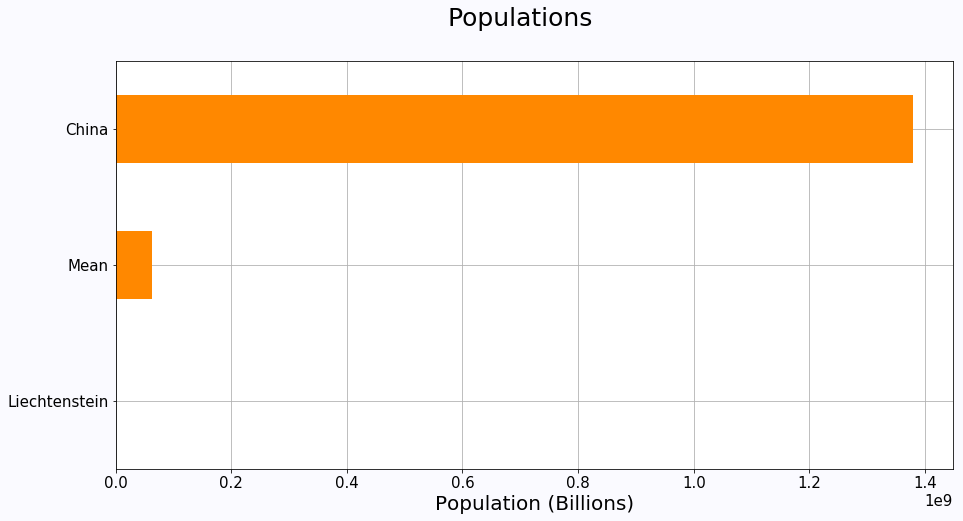

In [421]:
fig, ax = plt.subplots(facecolor='#fafaff')
range.sort_values().plot(kind='barh',color='#ff8800')

plt.grid()
plt.ylabel('',fontsize=20)
plt.xlabel('Population (Billions)',fontsize=20)
fig.suptitle('Populations', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/PopRange.png')

In [422]:
popVals = df.sort_values('Population').reset_index().iloc[[0,-1]].set_index('Country').Population
rangePop = popVals[popVals.index[1]]-popVals[popVals.index[0]]
print('The range of populations range is '+str(rangePop))

The range of populations range is 1378641074.0


# Distribution

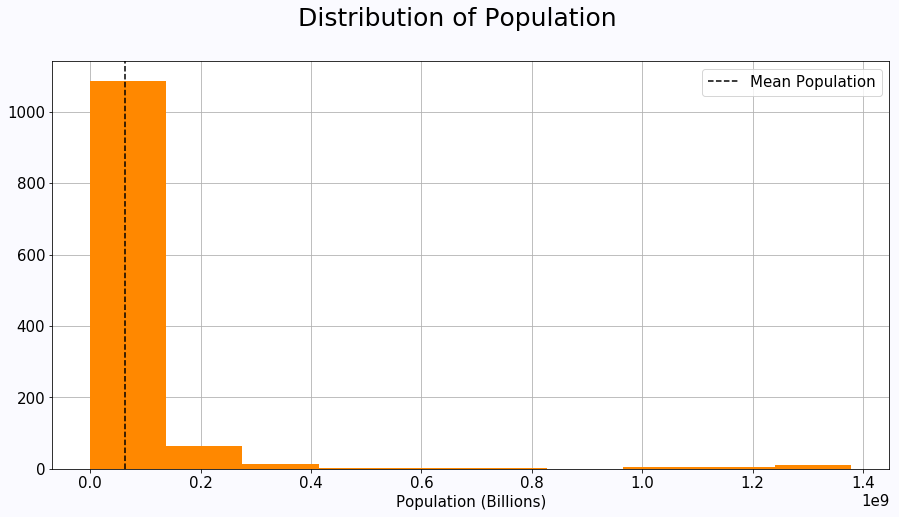

In [423]:
fig, ax = plt.subplots(facecolor='#fafaff')
df.Population.hist(color='#ff8800')
plt.axvline(x=df.Population.mean(),color='k',label='Mean Population',linestyle='--')

fig.suptitle('Distribution of Population', fontsize=25)
plt.ylabel('')
plt.xlabel('Population (Billions)')
ax.set_axisbelow(True)
plt.legend()
plt.show()

fig.savefig('../../data/final/Graphs/PopDist.png')

In [424]:
fig, ax = plt.subplots(facecolor='#fafaff')

rangeArr.sort_values().plot(kind='barh',color='Green')

plt.grid()
plt.xlabel('GDP (Trillions)')
plt.ylabel('')
fig.suptitle('GDP Range', fontsize=25)
ax.set_axisbelow(True)


plt.show()
fig.savefig('../../data/final/Graphs/GDPRange.png')

NameError: name 'rangeArr' is not defined

# Populations

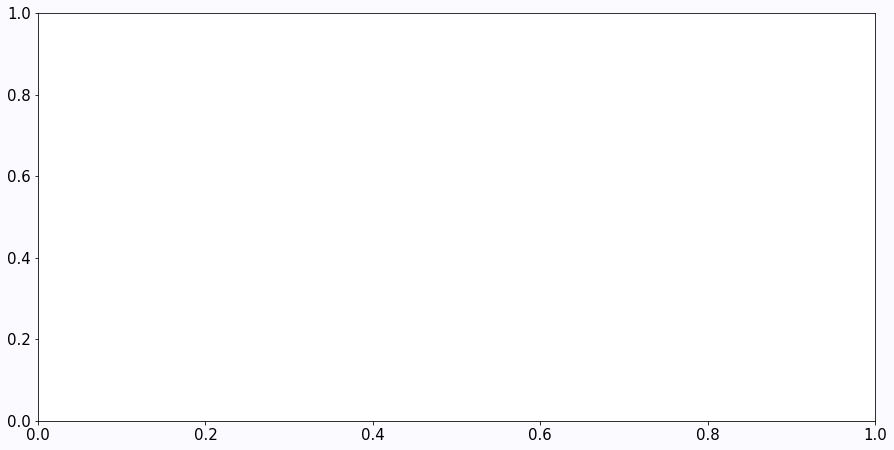

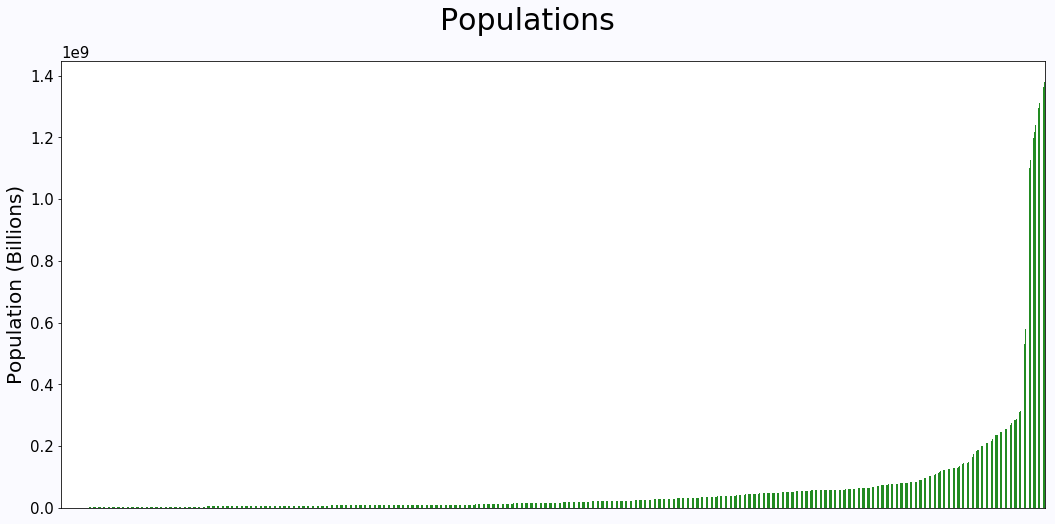

In [425]:
fig, ax = plt.subplots(facecolor='#fafaff')
df.sort_values('Population').Population.plot(kind='bar',color='#228B22')
plt.tick_params(
    axis='x',   
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off') 
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Population (Billions)',fontsize=20)
plt.xlabel('',fontsize=20)
fig.suptitle('Populations', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

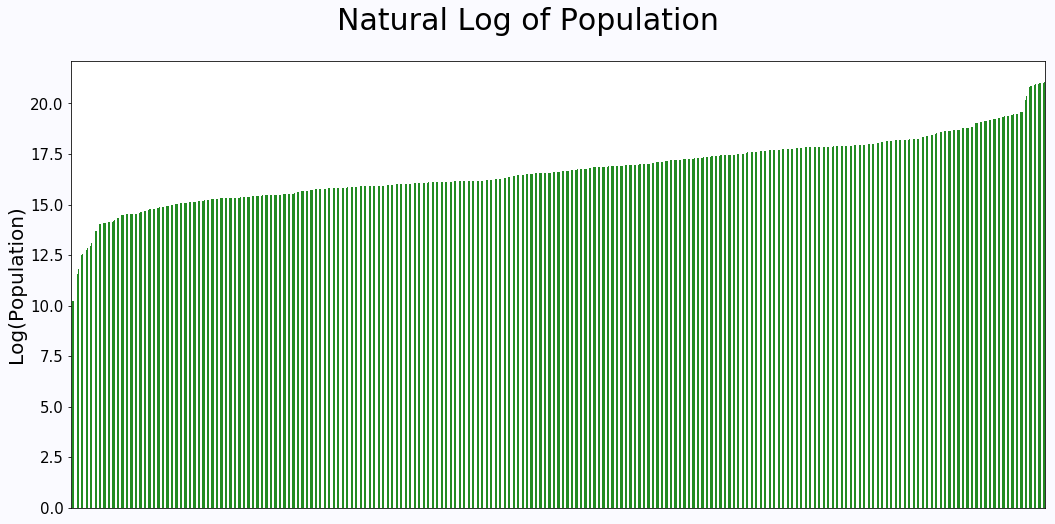

In [426]:
fig, ax = plt.subplots(facecolor='#fafaff')
df.sort_values('Population').Population.apply(math.log).plot(kind='bar',color='#228B22')
plt.tick_params(
    axis='x',   
    which='both',      
    bottom='off',      
    top='off',         
    labelbottom='off') 
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Log(Population)',fontsize=20)
plt.xlabel('',fontsize=20)
fig.suptitle('Natural Log of Population', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [427]:
df['Log_Pop'] = df.Population.apply(math.log)
df.head()

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,norm_Rating_Share,norm_Population,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,Ath_Rating,Log_Pop
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,0.000000,0.019780,0.005080,0.000246,0.000315,0.000273,0.019769,0.019792,1,17.122179
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,0.000048,0.022249,0.005726,0.000372,0.000280,0.000379,0.022204,0.022296,1,17.239674
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,0.006418,0.021316,0.001466,0.003090,0.001726,0.003190,0.020957,0.021698,7,17.196893
3,Algeria,Barcelone,1992,0.001779,0.001168,0.001180,13764639.0,13416455.0,True,False,...,0.002484,0.019699,0.001347,0.002904,0.000622,0.002739,0.019361,0.020057,3,17.118032
4,Algeria,Beijing,2008,0.000000,0.000981,0.000743,17605574.0,17255141.0,True,False,...,0.000000,0.025269,0.001755,0.002337,0.005806,0.003552,0.024768,0.025802,1,17.366871


In [428]:
mx = df.Log_Pop.max()
mn = df.Log_Pop.min()

In [429]:
df['norm_Log_Pop'] = df.Log_Pop.apply(lambda x : (x-mn)/(mx-mn))
df.head()

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,norm_Population,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,Ath_Rating,Log_Pop,norm_Log_Pop
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,0.019780,0.005080,0.000246,0.000315,0.000273,0.019769,0.019792,1,17.122179,0.642189
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,0.022249,0.005726,0.000372,0.000280,0.000379,0.022204,0.022296,1,17.239674,0.652908
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,0.021316,0.001466,0.003090,0.001726,0.003190,0.020957,0.021698,7,17.196893,0.649005
3,Algeria,Barcelone,1992,0.001779,0.001168,0.001180,13764639.0,13416455.0,True,False,...,0.019699,0.001347,0.002904,0.000622,0.002739,0.019361,0.020057,3,17.118032,0.641811
4,Algeria,Beijing,2008,0.000000,0.000981,0.000743,17605574.0,17255141.0,True,False,...,0.025269,0.001755,0.002337,0.005806,0.003552,0.024768,0.025802,1,17.366871,0.664512


## Outliers

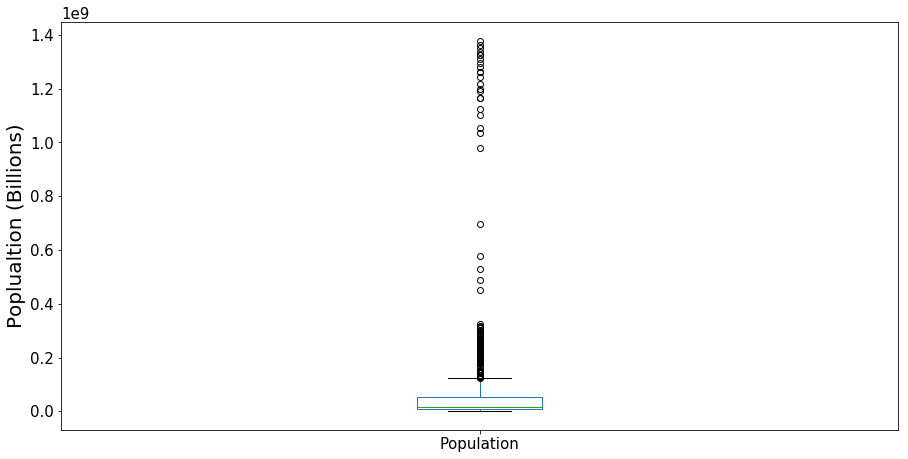

In [430]:
df[['Population']].boxplot()
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('Poplualtion (Billions)',fontsize=20)
plt.xlabel('',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [431]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [432]:
outliers = df.iloc[outliers_iqr(df.Population)][['Country','Host_City','Year','Population']].drop_duplicates()

In [433]:
outliers.Country.unique()

array(['Brazil', 'China', 'India', 'Indonesia', 'Japan', 'Mexico',
       'Nigeria', 'Russian Federation', 'Soviet Union', 'Unified Team',
       'United States'], dtype=object)

In [434]:
outliers.Population.min()

124961000.0

# Ratings Per Captia

In [435]:
df['Rating_Capita'] = df.Ath_Rating/df.Population
df.head()

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,Ath_Rating,Log_Pop,norm_Log_Pop,Rating_Capita
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,0.005080,0.000246,0.000315,0.000273,0.019769,0.019792,1,17.122179,0.642189,3.663805e-08
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,0.005726,0.000372,0.000280,0.000379,0.022204,0.022296,1,17.239674,0.652908,3.257652e-08
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,0.001466,0.003090,0.001726,0.003190,0.020957,0.021698,7,17.196893,0.649005,2.380028e-07
3,Algeria,Barcelone,1992,0.001779,0.001168,0.001180,13764639.0,13416455.0,True,False,...,0.001347,0.002904,0.000622,0.002739,0.019361,0.020057,3,17.118032,0.641811,1.103708e-07
4,Algeria,Beijing,2008,0.000000,0.000981,0.000743,17605574.0,17255141.0,True,False,...,0.001755,0.002337,0.005806,0.003552,0.024768,0.025802,1,17.366871,0.664512,2.868558e-08


In [436]:
df['Rating_Share_Capita'] = df.Rating_Share/df.Population
df.head()

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,Ath_Rating,Log_Pop,norm_Log_Pop,Rating_Capita,Rating_Share_Capita
0,Afghanistan,Beijing,2008,0.000000,0.000490,0.000248,14054874.0,13239157.0,True,False,...,0.000246,0.000315,0.000273,0.019769,0.019792,1,17.122179,0.642189,3.663805e-08,9.077812e-12
1,Afghanistan,London,2012,0.000000,0.000514,0.000260,15784301.0,14912657.0,True,False,...,0.000372,0.000280,0.000379,0.022204,0.022296,1,17.239674,0.652908,3.257652e-08,8.472436e-12
2,Algeria,Atlanta,1996,0.003252,0.001616,0.001894,14898762.0,14512653.0,True,False,...,0.003090,0.001726,0.003190,0.020957,0.021698,7,17.196893,0.649005,2.380028e-07,6.439471e-11
3,Algeria,Barcelone,1992,0.001779,0.001168,0.001180,13764639.0,13416455.0,True,False,...,0.002904,0.000622,0.002739,0.019361,0.020057,3,17.118032,0.641811,1.103708e-07,4.341036e-11
4,Algeria,Beijing,2008,0.000000,0.000981,0.000743,17605574.0,17255141.0,True,False,...,0.002337,0.005806,0.003552,0.024768,0.025802,1,17.366871,0.664512,2.868558e-08,2.132229e-11


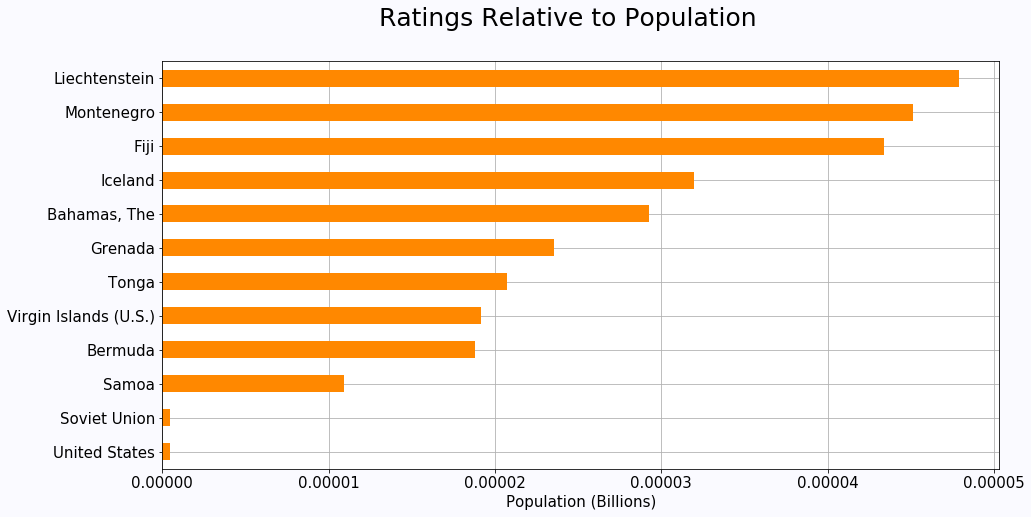

In [437]:
fig, ax = plt.subplots(facecolor='#fafaff')
temp = df.groupby(['Country'])['Rating_Capita'].mean().sort_values()
ten = df.groupby(['Country'])['Rating_Capita'].mean().sort_values().tail(10)
ten['United States'] = temp.loc['United States']
ten['Soviet Union'] = temp.loc['Soviet Union']
ten.sort_values().plot(kind='barh',ax=ax,color='#ff8800')


plt.grid()
plt.ylabel('')
plt.xlabel('Population (Billions)')
ax.set_axisbelow(True)
fig.suptitle('Ratings Relative to Population', fontsize=25)
plt.show()

fig.savefig('../../data/final/Graphs/AveRatingPerCaptia.png')

In [438]:
df[df.Country == 'Liechtenstein']

,Country,Host_City,Year,Gold_Share,Medal_Share,Rating_Share,Males,Females,Summer,Winter,...,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,Ath_Rating,Log_Pop,norm_Log_Pop,Rating_Capita,Rating_Share_Capita
652,Liechtenstein,Calgary,1988,0.000000,0.003788,0.001894,13388.0,14707.0,False,True,...,1.000000,0.567621,1.000000,0.000003,0.000003,1,10.243347,0.014653,0.000036,6.741197e-08
653,Liechtenstein,Innsbruck,1976,0.000000,0.009524,0.004762,11404.0,12522.0,False,True,...,0.640344,1.000000,0.812931,0.000000,0.000000,1,10.082721,0.000000,0.000042,1.990264e-07
654,Liechtenstein,Lake Placid,1980,0.027778,0.018349,0.022936,12328.0,13538.0,False,True,...,0.394895,0.924952,0.584845,0.000001,0.000002,2,10.160685,0.007112,0.000077,8.867154e-07
655,Liechtenstein,Sarajevo,1984,0.000000,0.009009,0.004505,12868.0,14143.0,False,True,...,0.662075,0.885385,0.800093,0.000002,0.000002,1,10.203999,0.011064,0.000037,1.667656e-07


# Countries whos Populations have changed

In [439]:
countryDict = dict()
for country in df.Country.unique():
    temp = df[df.Country == country].sort_values('Year').reset_index()
    prev = temp.loc[0].Population
    last = temp.loc[len(temp)-1].Population
    diff = last-prev
    countryDict[country] = (diff/prev)*100
    print(country+" - "+str((diff/prev)*100)+"%")

Afghanistan - 12.4676600536%
Algeria - 85.4678205796%
Argentina - 112.654689893%
Armenia - -7.68252785875%
Australia - 134.780450538%
Austria - 24.1193273283%
Azerbaijan - 25.7538838078%
Bahamas, The - 192.623674251%
Bahrain - 9.61024198268%
Barbados - 0.0%
Belarus - -7.03901437372%
Belgium - 23.9763220341%
Bermuda - 0.0%
Botswana - 0.0%
Brazil - 187.577758139%
Brtitsh West Indies - 0.0%
Bulgaria - -9.40023952084%
Burundi - 74.2082749004%
Cameroon - 239.584815896%
Canada - 102.615482521%
Chile - 30.0797055201%
China - 32.9698840209%
Colombia - 110.194984595%
Costa Rica - 33.3118360419%
Cote d'Ivoire - 141.153942248%
Croatia - -6.69798657718%
Cuba - 47.3708339358%
Cyprus - 0.0%
Czech Republic - 2.38862087662%
Czechoslovakia - 14.2942469847%
Denmark - 25.1444284581%
Djibouti - 0.0%
Dominican Republic - 67.6559913042%
Ecuador - 23.6580474018%
Egypt, Arab Rep. - 254.448035976%
Eritrea - 0.0%
Estonia - -14.1289721223%
Ethiopia - 362.290238965%
Fiji - 0.0%
Finland - 24.0530481751%
France - 4

In [440]:
sortedDict = [(k, countryDict[k]) for k in sorted(countryDict, key=countryDict.get, reverse=True)]
sortedDict

[('Kenya', 426.74717398844388),
 ('Qatar', 418.61066320630778),
 ('Ethiopia', 362.29023896499336),
 ('Niger', 333.57065467469283),
 ('Uganda', 309.1865586526194),
 ('Venezuela, RB', 287.48952815733497),
 ('Nigeria', 279.05966729465678),
 ('Iran, Islamic Rep.', 266.44809172706886),
 ('Egypt, Arab Rep.', 254.44803597558248),
 ('Philippines', 244.82745247819335),
 ('Singapore', 240.57841350826044),
 ('Cameroon', 239.58481589592742),
 ('Mexico', 234.10187249411331),
 ('South Africa', 221.38241852451145),
 ('India', 194.6003298989931),
 ('Bahamas, The', 192.62367425092373),
 ('Turkey', 189.42730050828231),
 ('Brazil', 187.57775813871217),
 ('Morocco', 186.13938788494849),
 ('Tunisia', 155.75785822086746),
 ('Pakistan', 153.28759434254158),
 ('Mongolia', 150.79843990244419),
 ("Cote d'Ivoire", 141.1539422484405),
 ('Australia', 134.78045053766968),
 ('Ghana', 132.45921289926306),
 ('United Arab Emirates', 126.75558858503237),
 ('Taiwan', 120.12089092652741),
 ('Argentina', 112.65468989273282

In [441]:
sortedDict[0:3]

[('Kenya', 426.74717398844388),
 ('Qatar', 418.61066320630778),
 ('Ethiopia', 362.29023896499336)]

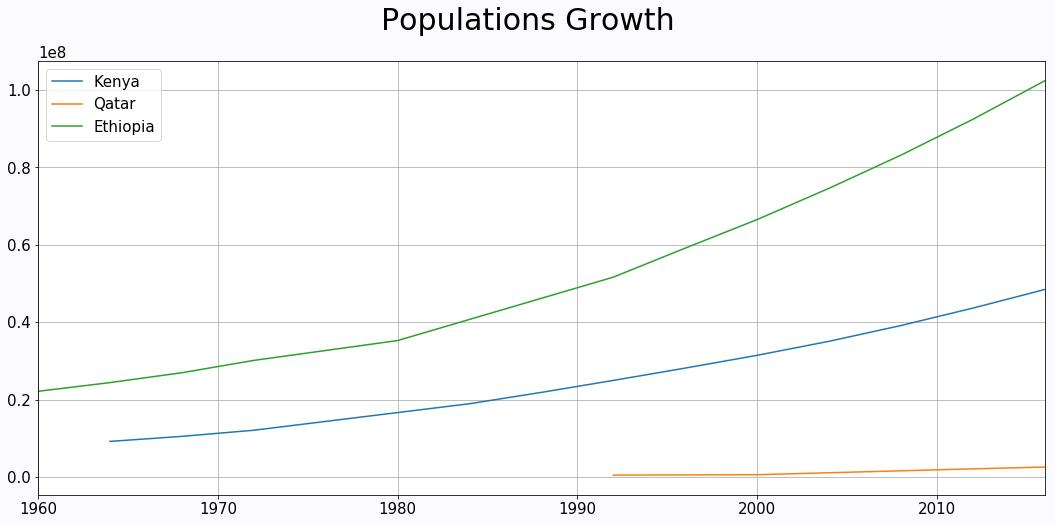

In [442]:
fig, ax = plt.subplots(facecolor='#fafaff')
df[df.Country == 'Kenya' ][['Country','Year','Host_City','Population']].drop_duplicates().sort_values('Year').set_index('Year').Population.plot(label='Kenya')
df[df.Country == 'Qatar' ][['Country','Year','Host_City','Population']].drop_duplicates().sort_values('Year').set_index('Year').Population.plot(label='Qatar')
df[df.Country == 'Ethiopia' ][['Country','Year','Host_City','Population']].drop_duplicates().sort_values('Year').set_index('Year').Population.plot(label='Ethiopia')
plt.legend()
plt.grid()
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'axes.titlepad': 30})
plt.ylabel('',fontsize=20)
plt.xlabel('',fontsize=20)
ax.set_axisbelow(True)
fig.suptitle('Populations Growth', fontsize=30)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

In [443]:
df[df.Country == 'Qatar' ][['Year','Population']]

,Year,Population
853,1992,495517.0
854,2012,2109568.0
855,2016,2569804.0
856,2000,592267.0


In [444]:
df.columns

Index(['Country', 'Host_City', 'Year', 'Gold_Share', 'Medal_Share',
       'Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation', 'norm_Gold_Share',
       'norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females', 'Ath_Rating', 'Log_Pop', 'norm_Log_Pop',
       'Rating_Capita', 'Rating_Share_Capita'],
      dtype='object')

# Examination of Atheletes Sent

In [445]:
repDF = df.set_index(['Country','Host_City','Summer','Year'])[['Male_Representation','Female_Representation']].reset_index()#.tail(10).plot(kind='bar')
aveRep = repDF.groupby(['Year','Summer'])[['Male_Representation','Female_Representation']].mean().reset_index('Summer')
repDF.head()

,Country,Host_City,Summer,Year,Male_Representation,Female_Representation
0,Afghanistan,Beijing,True,2008,2.134491e-07,7.553351e-08
1,Afghanistan,London,True,2012,3.167704e-07,6.705713e-08
2,Algeria,Atlanta,True,1996,2.550547e-06,4.134323e-07
3,Algeria,Barcelone,True,1992,2.397448e-06,1.490707e-07
4,Algeria,Beijing,True,2008,1.931207e-06,1.390890e-06


In [446]:
Max_Male = [] 
Min_Male = []

Max_Female = [] 
Min_Female = []

for i in aveRep.reset_index().index:
    year = aveRep.reset_index().loc[i].Year
    summer = aveRep.reset_index().loc[i].Summer
    Max_Male.append(repDF.set_index(['Year','Summer']).loc[year].loc[summer]['Male_Representation'].max())
    Min_Male.append(repDF.set_index(['Year','Summer']).loc[year].loc[summer]['Male_Representation'].min())
    Max_Female.append(repDF.set_index(['Year','Summer']).loc[year].loc[summer]['Female_Representation'].max())
    Min_Female.append(repDF.set_index(['Year','Summer']).loc[year].loc[summer]['Female_Representation'].min())
    
aveRep['Max_Male_Representation'] = Max_Male
aveRep['Min_Male_Representation'] = Min_Male
aveRep['Max_Female_Representation'] = Max_Female
aveRep['Min_Female_Representation'] = Min_Female
aveRep.head()

,Summer,Male_Representation,Female_Representation,Max_Male_Representation,Min_Male_Representation,Max_Female_Representation,Min_Female_Representation
Year,,,,,,,
1960,False,0.000005,0.000001,0.000020,4.883051e-07,0.000003,1.201737e-07
1960,True,0.000013,0.000001,0.000057,1.940249e-07,0.000006,0.000000e+00
1964,False,0.000007,0.000001,0.000028,5.127116e-07,0.000004,1.303169e-07
1964,True,0.000015,0.000001,0.000154,2.063633e-07,0.000007,0.000000e+00
1968,False,0.000008,0.000002,0.000029,4.865897e-07,0.000006,9.915909e-08


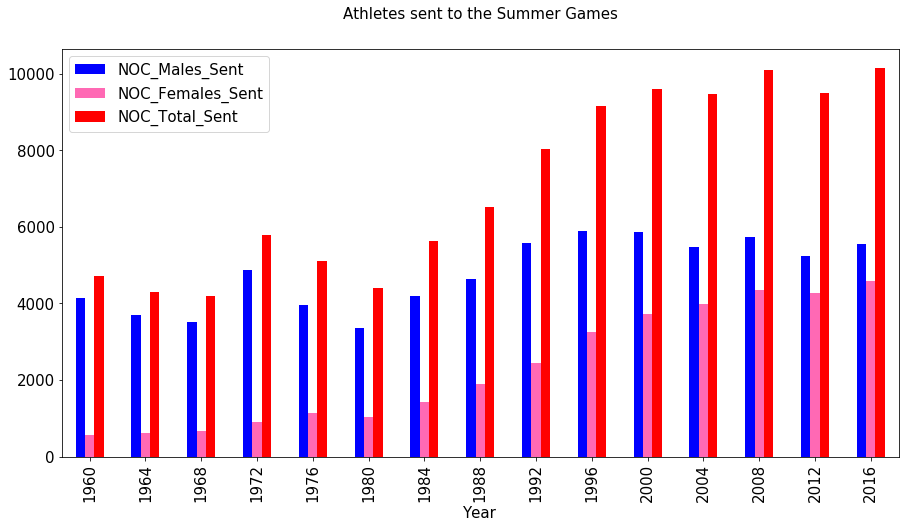

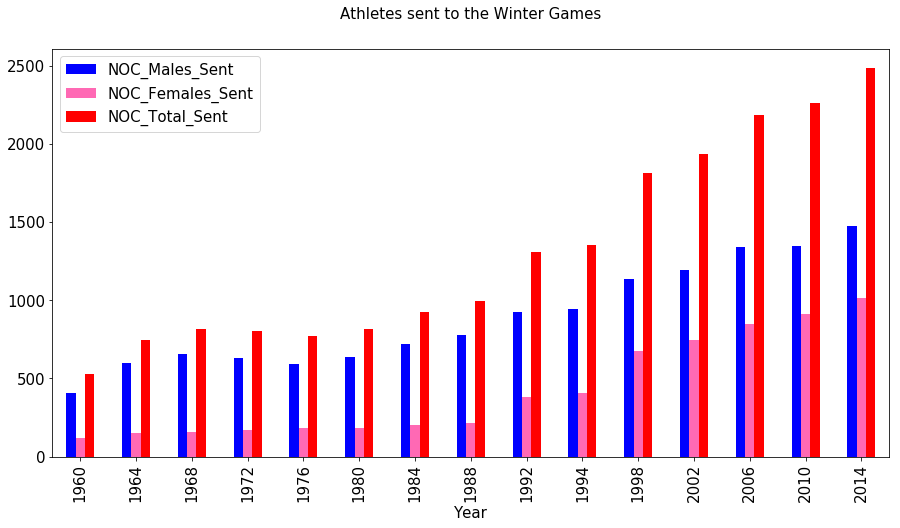

In [447]:
athSent = df.groupby(['Year','Summer'])[['NOC_Males_Sent','NOC_Females_Sent', 'NOC_Total_Sent']].sum().reset_index('Summer')
athSent[athSent.Summer][['NOC_Males_Sent','NOC_Females_Sent', 'NOC_Total_Sent']].plot(kind='bar', color=['blue','#FF69B4','red'])
plt.title('Athletes sent to the Summer Games')

athSent[~athSent.Summer][['NOC_Males_Sent','NOC_Females_Sent', 'NOC_Total_Sent']].plot(kind = 'bar',color=['blue','#FF69B4','red'])
plt.title('Athletes sent to the Winter Games')
plt.show()
plt.show()

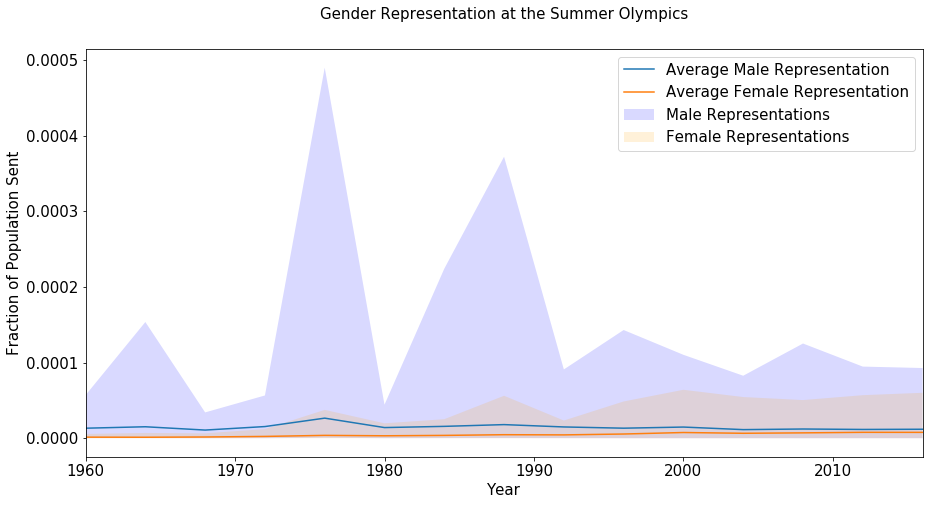

In [448]:
sumAve= aveRep[aveRep.Summer]
sumAve.Male_Representation.plot(label='Average Male Representation')
plt.fill_between(sumAve.index,sumAve.Min_Male_Representation,sumAve.Max_Male_Representation,facecolor='blue', alpha=0.15,
                label='Male Representations')

sumAve.Female_Representation.plot(label='Average Female Representation')
plt.fill_between(sumAve.index,sumAve.Min_Female_Representation,sumAve.Max_Female_Representation,facecolor='orange', alpha=0.15,
                label='Female Representations')

plt.title('Gender Representation at the Summer Olympics')
plt.ylabel('Fraction of Population Sent')
plt.legend(loc='upper right')



plt.show()

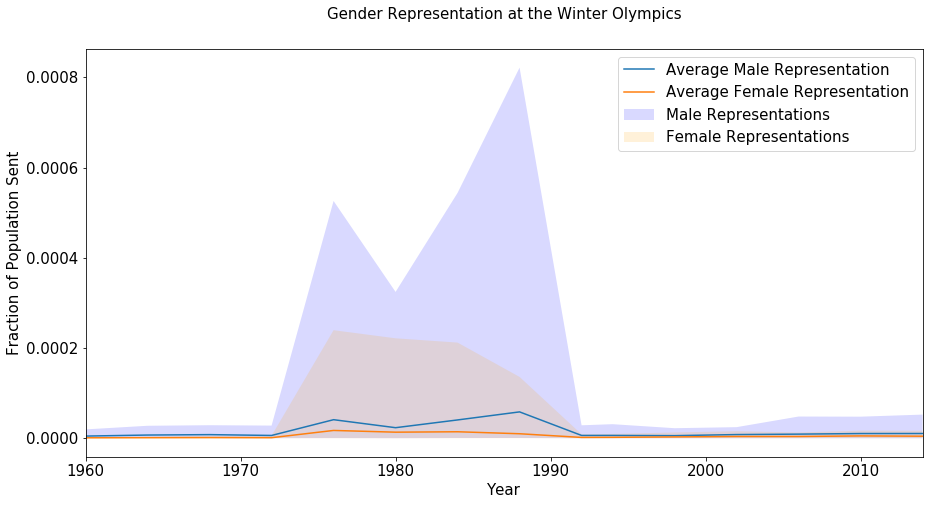

In [449]:
winAve = aveRep[~aveRep.Summer]
winAve.Male_Representation.plot(label='Average Male Representation')
plt.fill_between(winAve.index,winAve.Min_Male_Representation,winAve.Max_Male_Representation,facecolor='blue', alpha=0.15,
                label='Male Representations')

winAve.Female_Representation.plot(label='Average Female Representation')
plt.fill_between(winAve.index,winAve.Min_Female_Representation,winAve.Max_Female_Representation,facecolor='orange', alpha=0.15,
                label='Female Representations')

plt.title('Gender Representation at the Winter Olympics')
plt.ylabel('Fraction of Population Sent')
plt.legend(loc='upper right')
plt.show()

### Best and Worst Countries for Gender Participation

In [450]:
df.set_index(['Country','Host_City','Year']).sort_values('Female_Representation').tail(50).reset_index().Country.unique()

array(['Estonia', 'Slovenia', 'Australia', 'Jamaica', 'Croatia',
       'New Zealand', 'Bulgaria', 'Tonga', 'Norway', 'Samoa', 'Bahrain',
       'Denmark', 'Iceland', 'Grenada', 'Bermuda', 'Greece', 'Fiji',
       'Barbados', 'Bahamas, The', 'Montenegro', 'Virgin Islands (U.S.)',
       'Liechtenstein'], dtype=object)

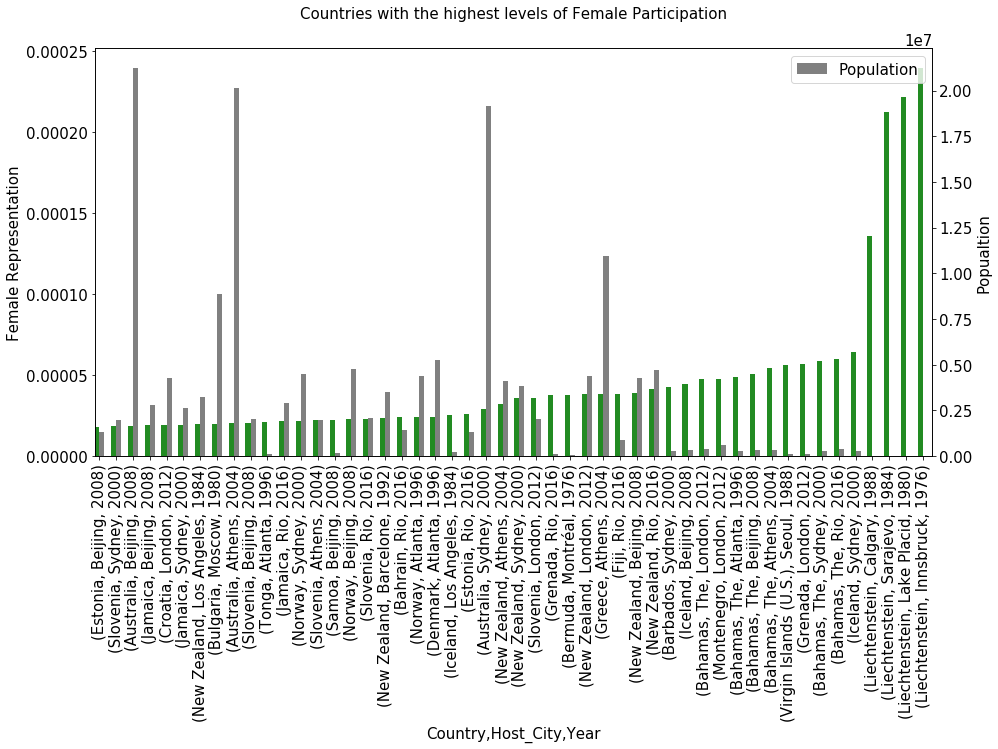

In [451]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 

width = 0.3

df.set_index(['Country','Host_City','Year']).sort_values('Female_Representation').tail(50)['Female_Representation'].plot(kind='bar', color='#228B22',width=width, ax=ax, position=1,label='Female Participation')
df.set_index(['Country','Host_City','Year']).sort_values('Female_Representation').tail(50)['Population'].plot(kind='bar', color='grey', ax=ax2, width=width, position=0)
plt.title('Countries with the highest levels of Female Participation')
ax2.set_ylabel("Popualtion")
ax.set_ylabel("Female Representation")
plt.legend()
plt.show()

In [452]:
temp[temp.Female_Representation == 0].Country.unique()

array([], dtype=object)

The above countries have sent 0 female atheletes to games

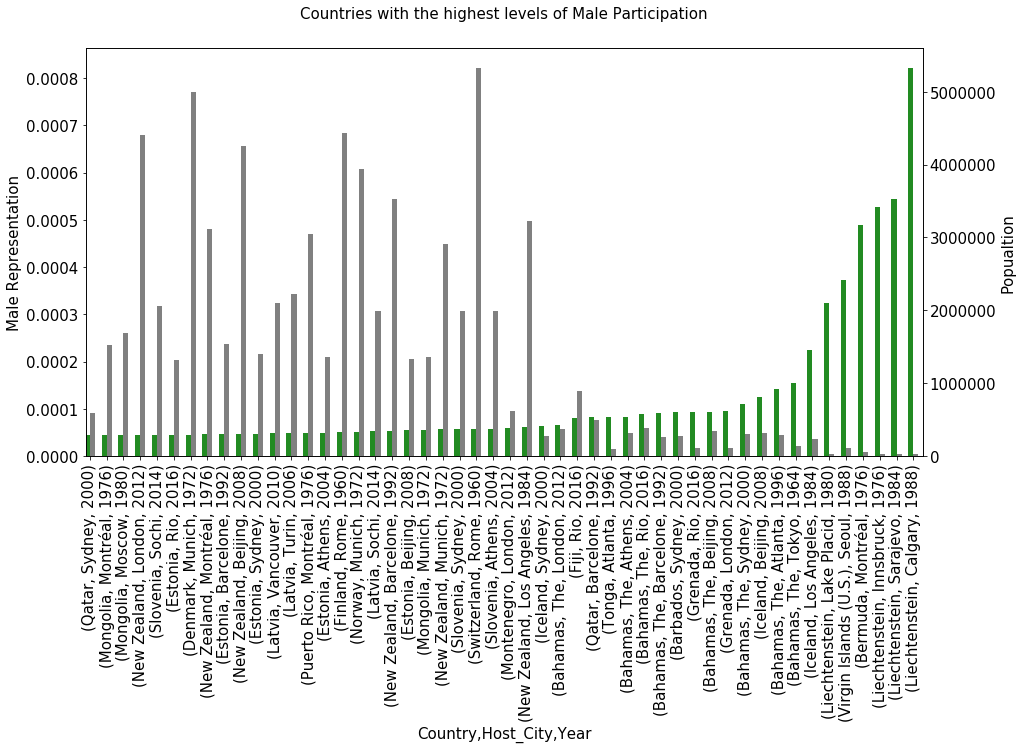

In [453]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 

width = 0.3

df.set_index(['Country','Host_City','Year']).sort_values('Male_Representation').tail(50)['Male_Representation'].plot(kind='bar', color='#228B22',width=width, ax=ax, position=1)
df.set_index(['Country','Host_City','Year']).sort_values('Male_Representation').tail(50)['Population'].plot(kind='bar', color='grey', ax=ax2, width=width, position=0)
plt.title('Countries with the highest levels of Male Participation')
ax2.set_ylabel("Popualtion")
ax.set_ylabel("Male Representation")
plt.show()

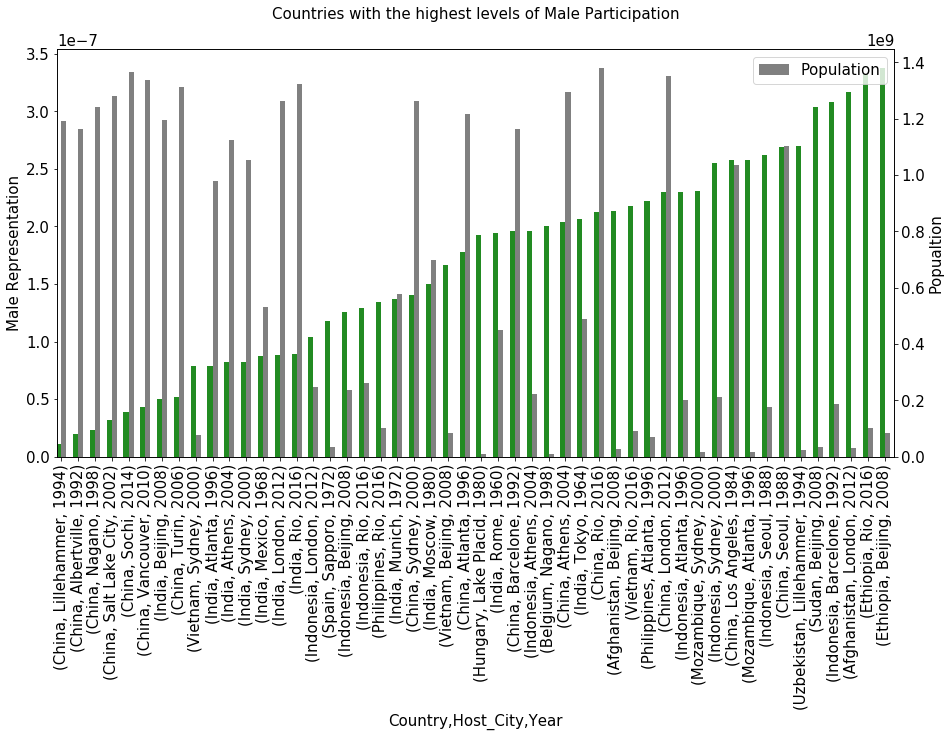

In [454]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx() 

width = 0.3

df.set_index(['Country','Host_City','Year']).sort_values('Male_Representation').head(50)['Male_Representation'].plot(kind='bar', color='#228B22',width=width, ax=ax, position=1)
df.set_index(['Country','Host_City','Year']).sort_values('Male_Representation').head(50)['Population'].plot(kind='bar', color='grey', ax=ax2, width=width, position=0)
plt.title('Countries with the highest levels of Male Participation')
ax2.set_ylabel("Popualtion")
ax.set_ylabel("Male Representation")
plt.legend()
plt.show()

# Population as a factor of Olympic Success

In [455]:


df.columns

Index(['Country', 'Host_City', 'Year', 'Gold_Share', 'Medal_Share',
       'Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation', 'norm_Gold_Share',
       'norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females', 'Ath_Rating', 'Log_Pop', 'norm_Log_Pop',
       'Rating_Capita', 'Rating_Share_Capita'],
      dtype='object')

In [456]:
def standardScatter(x,y,ytitle,xtitle,title):
    fig_size[0] = 12
    fig_size[1] = 12
    fig, ax = plt.subplots()
    ax.scatter(x,
                y,
                s=50,
                marker='o',
                facecolors='#228B22', 
                edgecolors='#228B22',
                )
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.show()

In [457]:
def standardScatterWithRect(x,y,ytitle,xtitle,title,text,Rcorner,Rwidth,Rheight):
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    fig, ax = plt.subplots()
    ax.scatter(x,
                y,
                s=50,
                marker='o',
                facecolors='#228B22', 
                edgecolors='#228B22',
                )
    ax.add_patch(
        patches.Rectangle(
            Rcorner,
            Rwidth,
            Rheight,
            fill=False
        )
    )
    ax.text(Rcorner[0]+Rwidth+.01, Rcorner[1]+(Rheight/2),text, color='Black', fontsize=20)
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.show()

In [458]:
def standardScatterLine(x,y,ytitle,xtitle,title):
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size
    fig, ax = plt.subplots(facecolor='#fafaff')
    x_nparray = (x.values).reshape(len(x), 1)
    y_nparray = (y.values).reshape(len(y), 1)
    
    regr = LinearRegression()
    regr.fit(x_nparray, y_nparray)
    
    fig, ax = plt.subplots()
    
    ax.plot(x_nparray, regr.predict(x_nparray), color='k', linewidth=4)
    ax.scatter(x,
                y,
                marker='o',
                facecolors='#228B22', 
                edgecolors='#228B22',
                )
    
    ax.set_ylabel(ytitle,fontsize=17)
    ax.set_xlabel(xtitle,fontsize=17)
    ax.set_title("\n"+title+"\n",fontsize=24)
    ax.locator_params(nbins=4)
    plt.tight_layout()
    plt.legend()
    plt.grid()
    plt.rcParams.update({'font.size': 18})
    plt.rcParams.update({'axes.titlepad': 30})
    ax.set_axisbelow(True)
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    plt.show()

## Population

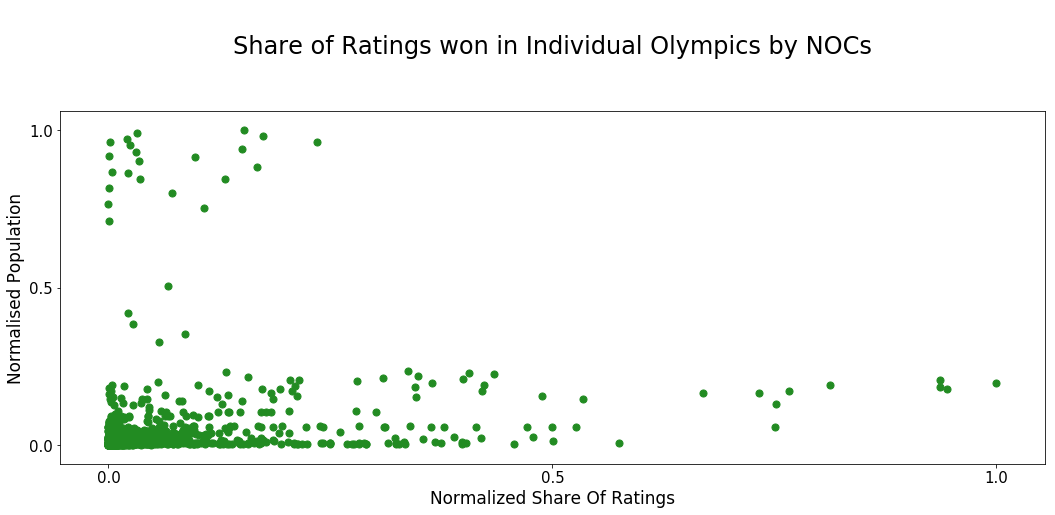

In [459]:
standardScatter(df['norm_Rating_Share'],
                df.norm_Population,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [460]:
# Linear Regression 
x = df.norm_Rating_Share
y = df.norm_Population
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

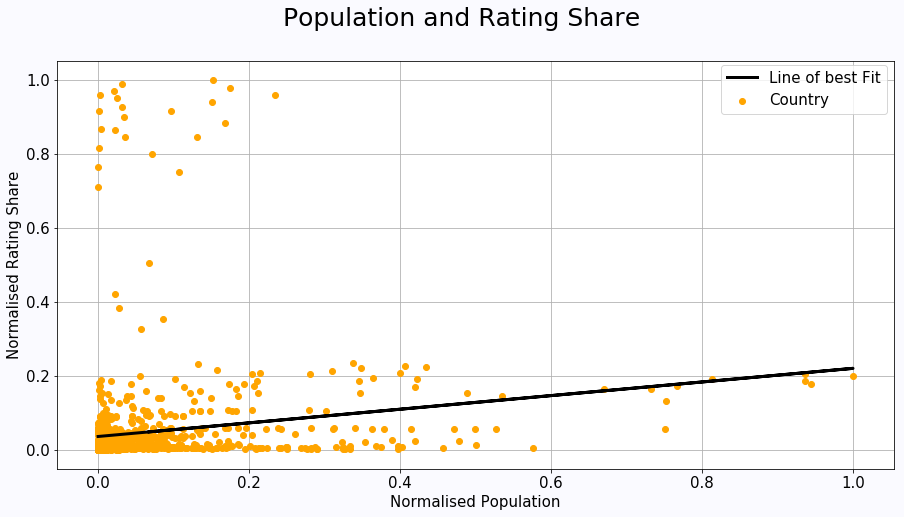

In [461]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Population')
plt.ylabel('Normalised Rating Share')
fig.suptitle('Population and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/Pop_Effect.png')

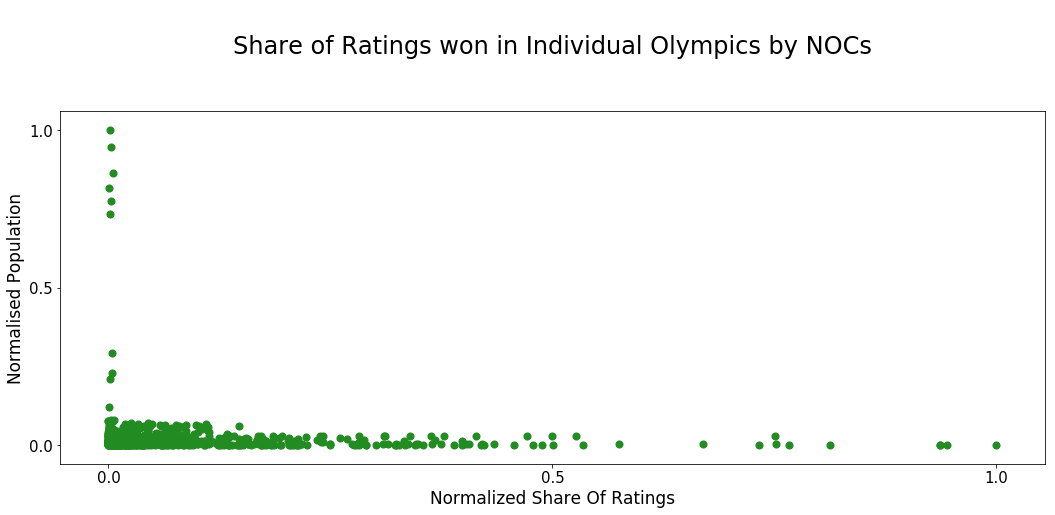

In [462]:
standardScatter(df['norm_Rating_Share'],
                df.norm_Population_Density,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [463]:
# Linear Regression 
x = df.norm_Rating_Share
y = df.norm_Population_Density
x_nparray = (x.values).reshape(len(x), 1)
y_nparray = (y.values).reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x_nparray, y_nparray)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

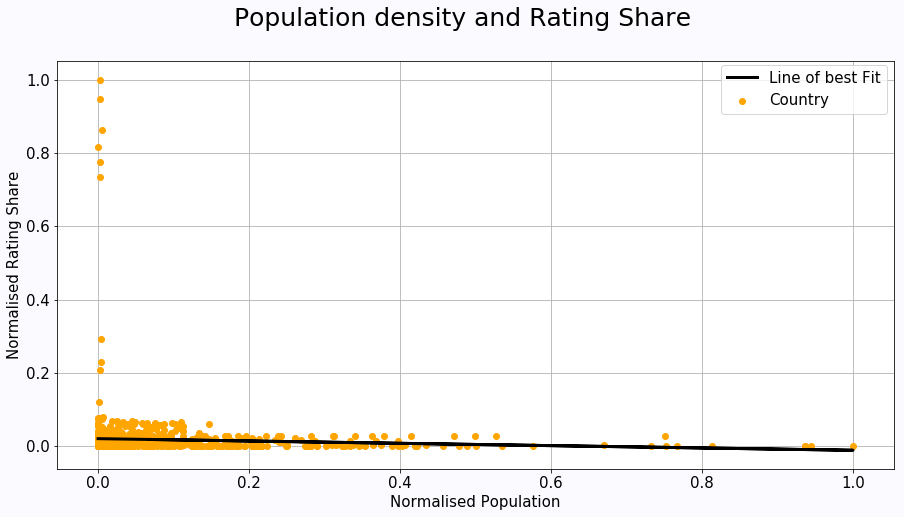

In [464]:
fig, ax = plt.subplots(facecolor='#fafaff')

ax.plot(x_nparray, regr.predict(x_nparray), color='black', linewidth=3)
ax.scatter(x, y, color='orange')
plt.legend()
plt.grid()
plt.xlabel('Normalised Population')
plt.ylabel('Normalised Rating Share')
fig.suptitle('Population density and Rating Share', fontsize=25)
ax.set_axisbelow(True)
ax.legend(('Line of best Fit', 'Country'), bbox_to_anchor=(1, 1.01), loc=1)


plt.show()
fig.savefig('../../data/final/Graphs/PopD_Effect.png')

In [465]:
temp[temp.norm_Population > .25].Country.unique()

array([], dtype=object)

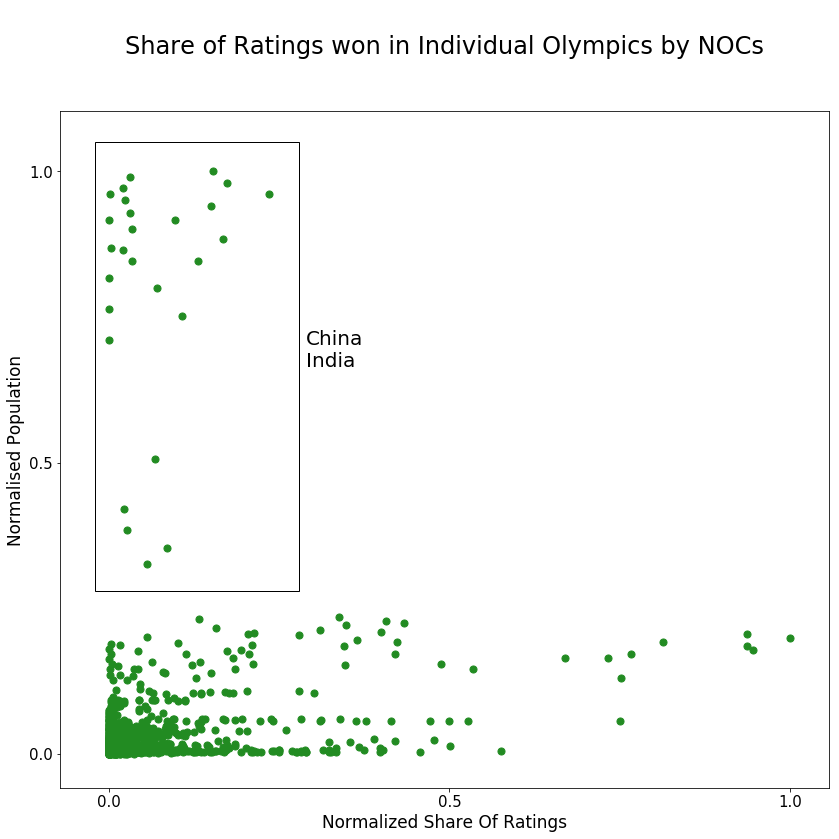

In [466]:
standardScatterWithRect(
                            df['norm_Rating_Share'],
                            df.norm_Population,
                            "Normalised Population",
                            "Normalized Share Of Ratings",
                            "Share of Ratings won in Individual Olympics by NOCs",
                            "China"+"\n"+"India",
                            (-0.02,0.28),
                            .3,
                            .77
               )

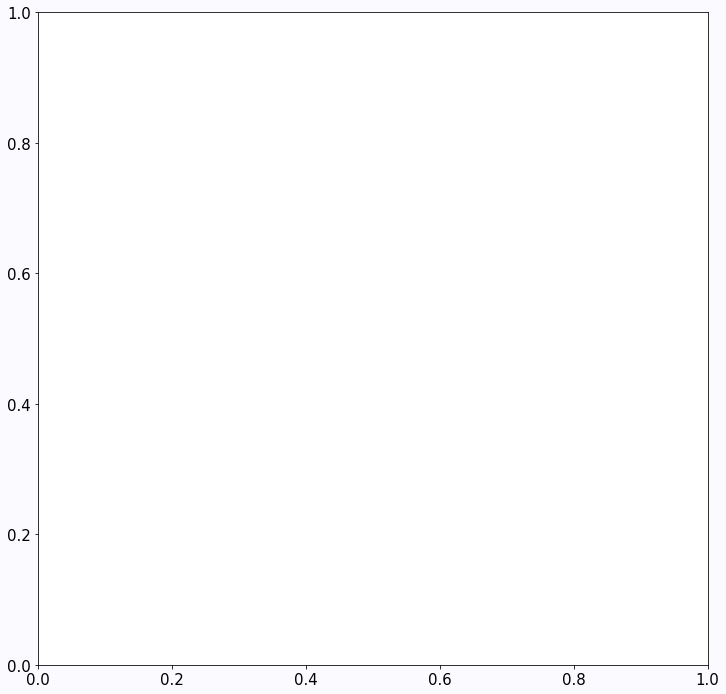

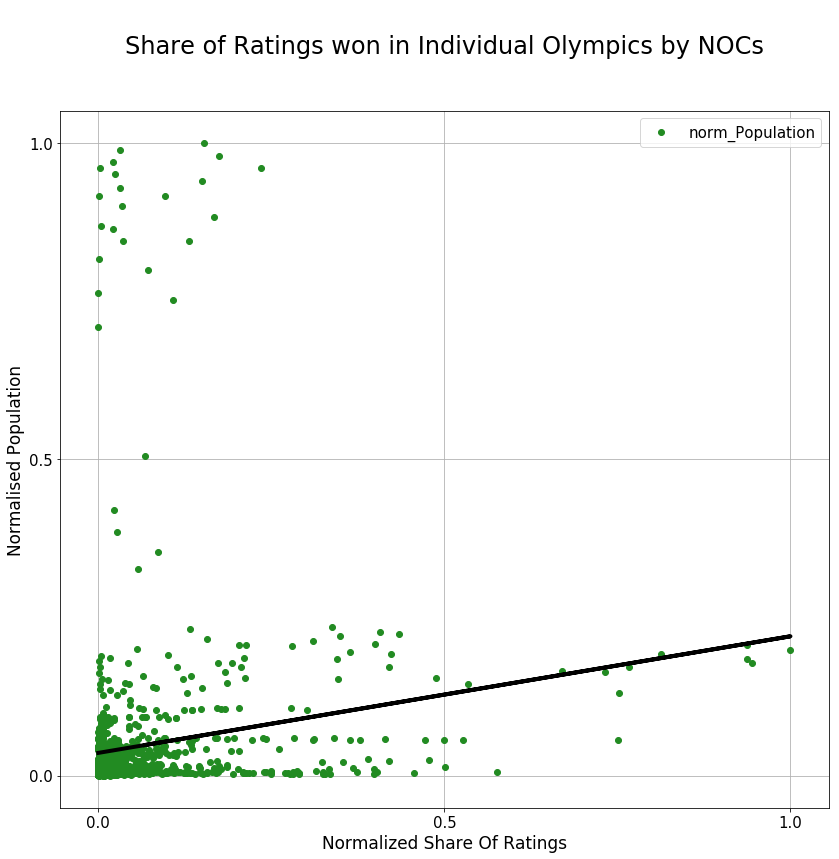

In [467]:
standardScatterLine(df['norm_Rating_Share'],
                df.norm_Population,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [468]:
p = temp['norm_Rating_Share'].corr(temp.norm_Population)
(p*p)*100

97.714626742404562

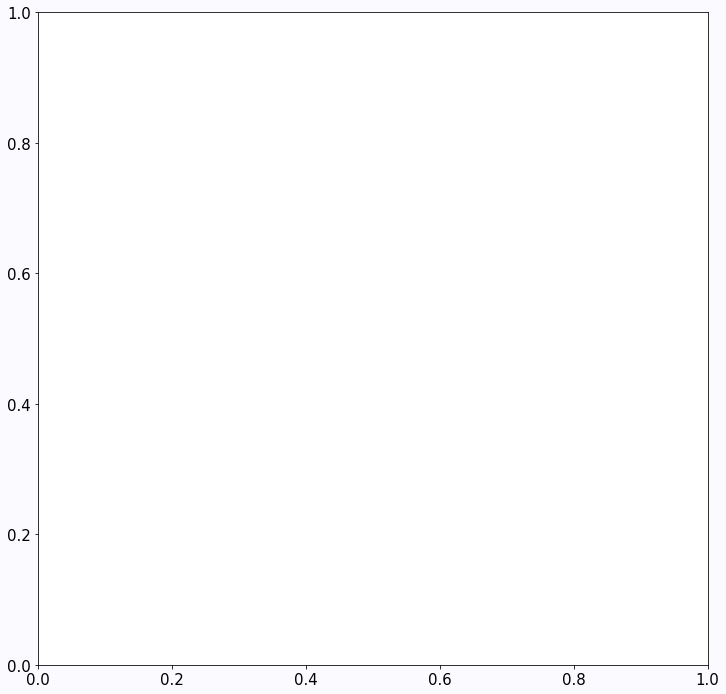

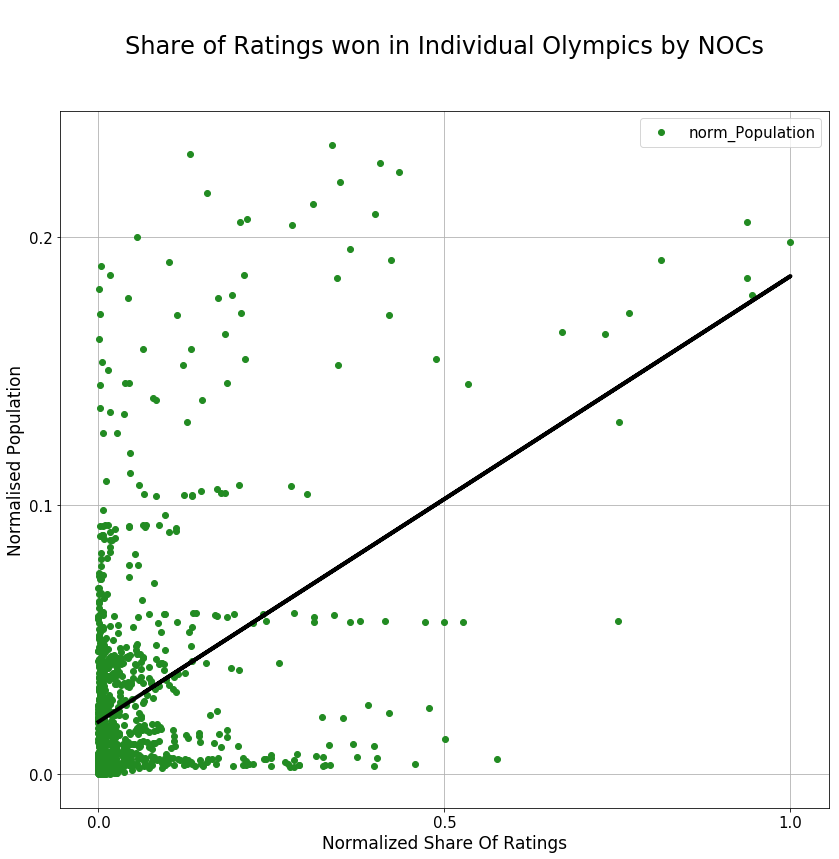

In [469]:
standardScatterLine(df[df.norm_Population < .25]['norm_Rating_Share'],
                df[df.norm_Population < .25].norm_Population,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [470]:
p = temp[temp.norm_Population < .25]['norm_Rating_Share'].corr(temp[temp.norm_Population < .25].norm_Population)
(p*p)*100

97.714626742404562

In [471]:
temp.columns

Index(['index', 'Country', 'Host_City', 'Year', 'Gold_Share', 'Medal_Share',
       'Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation', 'norm_Gold_Share',
       'norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females', 'Ath_Rating', 'Log_Pop', 'norm_Log_Pop',
       'Rating_Capita', 'Rating_Share_Capita'],
      dtype='object')

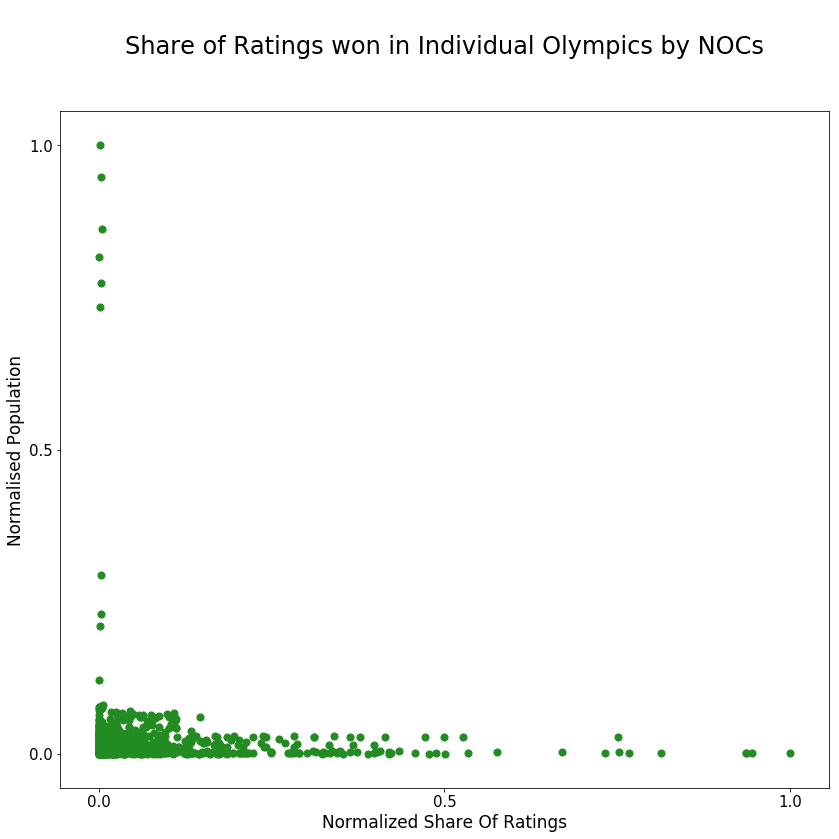

In [472]:
standardScatter(df['norm_Rating_Share'],
                df.norm_Population_Density,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [473]:
temp[temp.norm_Population_Density > .1].Country.unique()

array([], dtype=object)

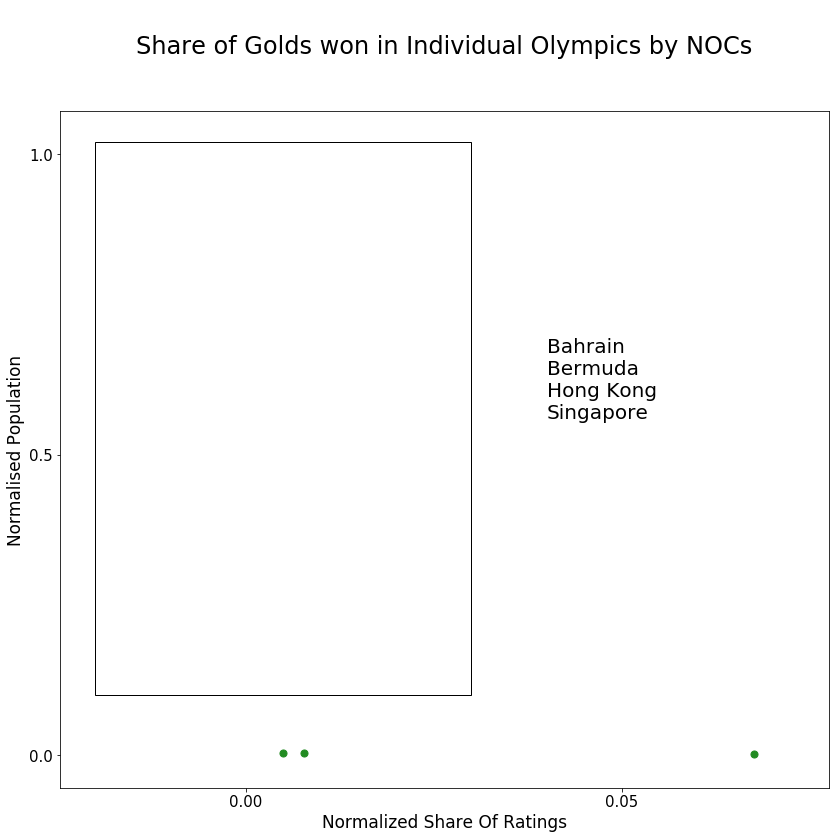

In [474]:
standardScatterWithRect(
                            temp['norm_Rating_Share'],
                            temp.norm_Population_Density,
                            "Normalised Population",
                            "Normalized Share Of Ratings",
                            "Share of Golds won in Individual Olympics by NOCs",
                            "Bahrain"+"\n"+"Bermuda"+"\n"+'Hong Kong'+"\n"+'Singapore',
                            (-0.02,0.1),
                            .05,
                            .92
               )

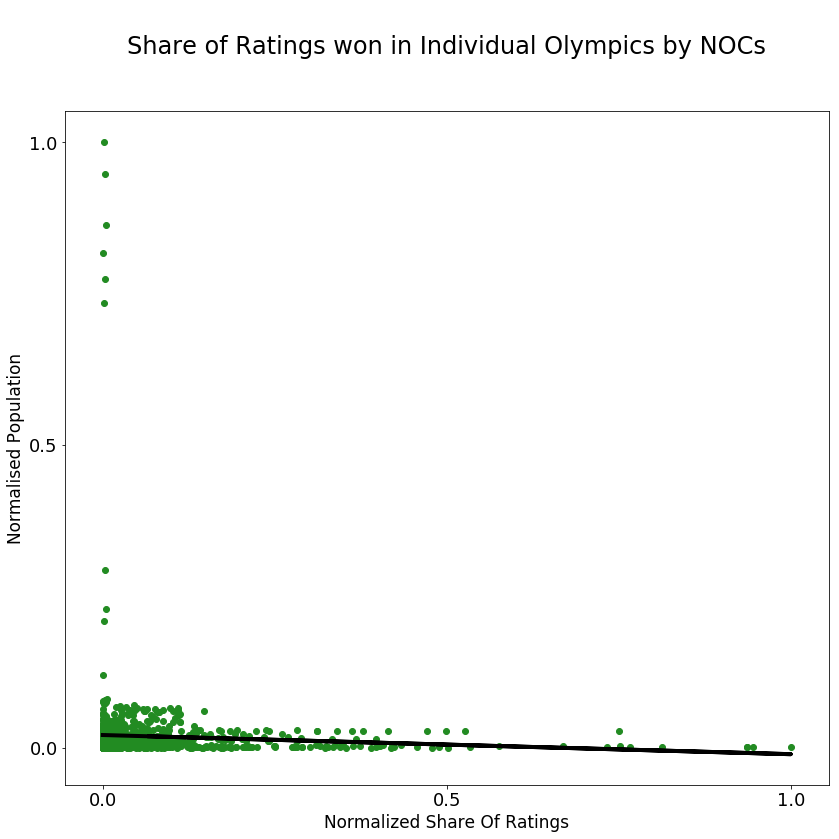

In [74]:
standardScatterLine(temp['norm_Rating_Share'],
                temp.norm_Population_Density,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

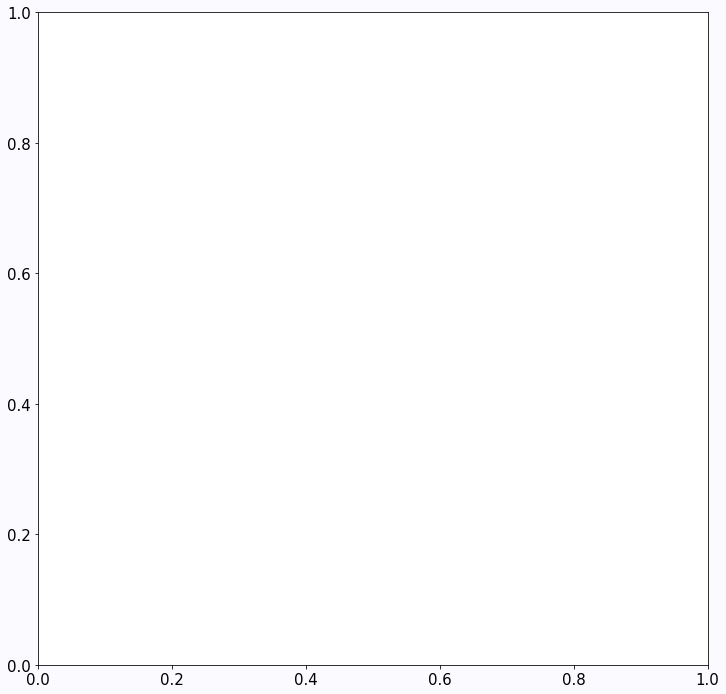

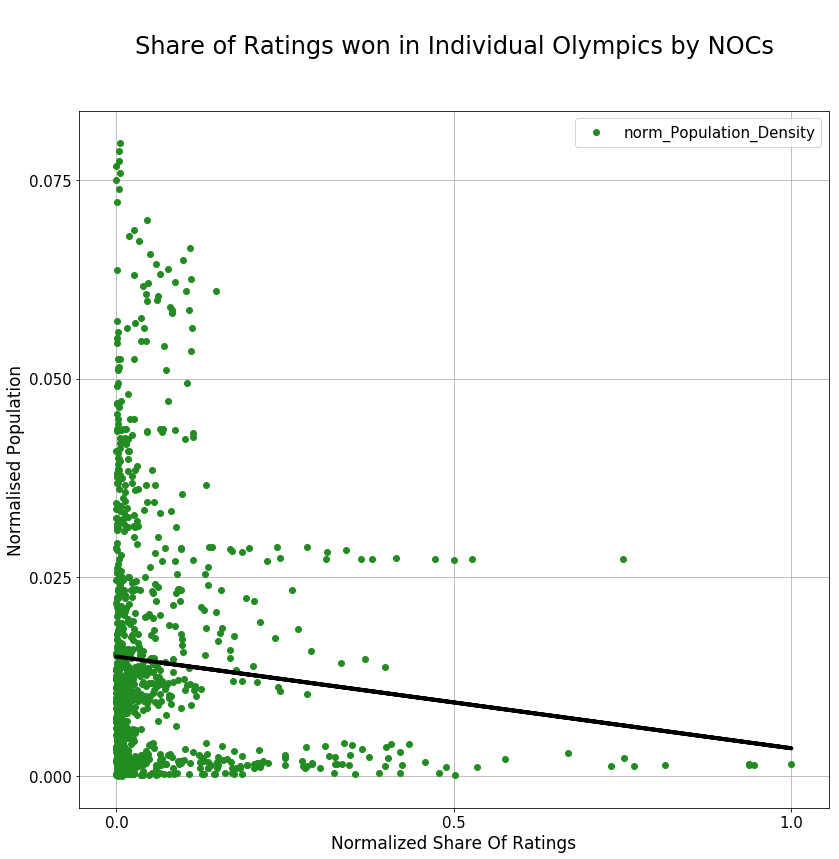

In [407]:
standardScatterLine(df[df.norm_Population_Density < .1]['norm_Rating_Share'],
                df[df.norm_Population_Density < .1].norm_Population_Density,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [76]:
temp.columns

Index(['Country', 'Host_City', 'Year', 'Gold_Share', 'Medal_Share',
       'Rating_Share', 'Males', 'Females', 'Summer', 'Winter',
       'Population_Density', 'Population', 'NOC_Males_Sent',
       'NOC_Females_Sent', 'NOC_Total_Sent', 'Female_Representation',
       'Male_Representation', 'Population_Representation', 'norm_Gold_Share',
       'norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females', 'norm_Log_Pop'],
      dtype='object')

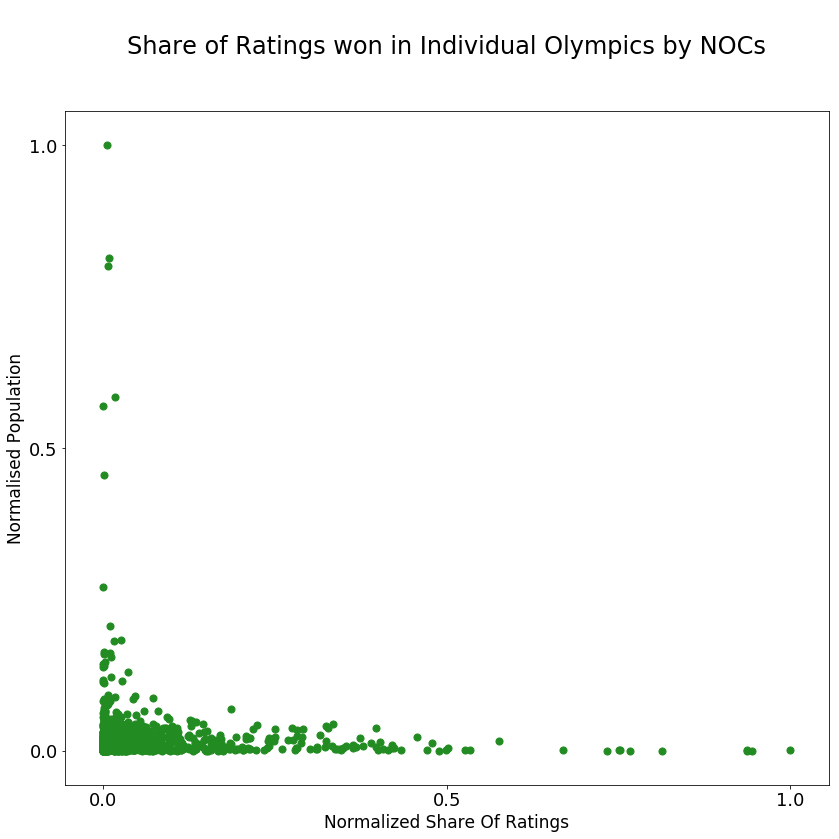

In [77]:
standardScatter(temp['norm_Rating_Share'],
                temp.norm_Population_Representation,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [78]:
temp[['norm_Medal_Share', 'norm_Rating_Share', 'norm_Population',
       'norm_Population_Density', 'norm_Male_Representation',
       'norm_Female_Representation', 'norm_Population_Representation',
       'norm_Males', 'norm_Females','norm_Log_Pop']].corr()

,norm_Medal_Share,norm_Rating_Share,norm_Population,norm_Population_Density,norm_Male_Representation,norm_Female_Representation,norm_Population_Representation,norm_Males,norm_Females,norm_Log_Pop
norm_Medal_Share,1.000000,0.966559,0.158798,-0.058182,-0.065156,-0.067092,-0.069079,0.147593,0.170517,0.259785
norm_Rating_Share,0.966559,1.000000,0.164896,-0.056389,-0.066821,-0.067054,-0.070291,0.153015,0.177324,0.269608
norm_Population,0.158798,0.164896,1.000000,-0.007431,-0.107911,-0.111986,-0.114368,0.999772,0.999748,0.590362
norm_Population_Density,-0.058182,-0.056389,-0.007431,1.000000,-0.006590,0.006297,-0.003459,-0.006239,-0.008681,-0.040775
norm_Male_Representation,-0.065156,-0.066821,-0.107911,-0.006590,1.000000,0.799787,0.986701,-0.105544,-0.110350,-0.496966
norm_Female_Representation,-0.067092,-0.067054,-0.111986,0.006297,0.799787,1.000000,0.885772,-0.109620,-0.114422,-0.479074
norm_Population_Representation,-0.069079,-0.070291,-0.114368,-0.003459,0.986701,0.885772,1.000000,-0.111877,-0.116933,-0.515894
norm_Males,0.147593,0.153015,0.999772,-0.006239,-0.105544,-0.109620,-0.111877,1.000000,0.999041,0.581622
norm_Females,0.170517,0.177324,0.999748,-0.008681,-0.110350,-0.114422,-0.116933,0.999041,1.000000,0.599275
norm_Log_Pop,0.259785,0.269608,0.590362,-0.040775,-0.496966,-0.479074,-0.515894,0.581622,0.599275,1.000000


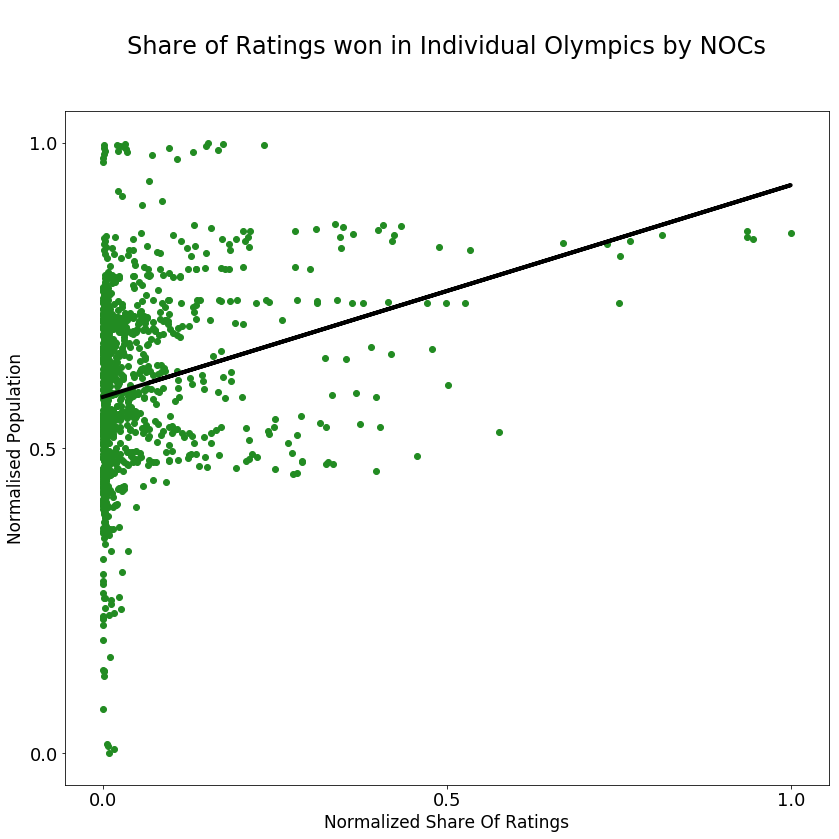

In [79]:
standardScatterLine(temp['norm_Rating_Share'],
                temp.norm_Log_Pop,
                "Normalised Population",
                "Normalized Share Of Ratings",
                "Share of Ratings won in Individual Olympics by NOCs")

In [80]:
temp['norm_Rating_Share'].corr(temp.norm_Log_Pop)

0.26960806444539376